## Desafio 2

> Atenção: este notebook foi desenhado para funcionar no **Kaggle**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-collab```.

Construa um detector de bocejos que por meio da identificação de regiões da face calcule a área da boca e indique quando há ou não um bocejo.
Crie um contador de bocejos e que as informações sejam exibidas em tempo real utilizando uma webcam.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Kaggle.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [ ]:
!rm -rf fiap-ml-visao-computacional/

In [ ]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [ ]:
%cd fiap-ml-visao-computacional/aula-4-classificacao-objetos-analise-facial/desafio-2/

Importação de bibliotecas.

In [3]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

import dlib

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

## 2. Solução

Função para analisar e extrair os marcos faciais. Seu resultado será utilizado para cálculdo da área do contorno dos pontos da boca.

In [4]:
classificador_68_path = "../modelos/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_68_path)
detector_face_dlib = dlib.get_frontal_face_detector()

def obter_marcos(imagem):
    
    faces = detector_face_dlib(imagem, 1)

    if len(faces) == 0:
        print("Não foi encontrada nenhuma face.")
        return None
        
    marcos_faciais = []
    
    for face in faces:
        marcos_faciais.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem, face).parts()]))

    return marcos_faciais

Os pontos de contorno da boca são do 48 ao 61, representada pela variál ```LABIO```.

In [5]:
LABIO = list(range(48, 61))

Análise do valor da área do contorno da boca necessário para indicar que a pessoa está com a boca aberta, portanto bocejando.
Para termos um panorama detalhado, iremos armazenar os valores da área da boca ao longo do tempo. Para o processamento não ser elevado iremos processar os dados a cada 5 quadros, pois eles não determinam nenhum movimento brusco e equivalem a menos de 1 segundo pois o vídeo possui 30 quadros por segundo.

In [19]:
video = cv2.VideoCapture("videos/bocejo-gray.mp4")

timestamp = 0

tempo= []
area_boca=[]

print("Analisando...")

frame_c = 0

while True:
    ret, frame = video.read()
    if ret:
        frame_c += 1
        if frame_c == 5:
            frame_c = 0
            timestamp += 1
            marcos_faciais = obter_marcos(frame)
            if marcos_faciais is not None:
                area_boca.append(cv2.contourArea(marcos_faciais[0][LABIO]))
                tempo.append(timestamp)
    else:
        break

print("Terminado")

video.release()

Analisando...
Terminado


Plotagem do gráfico da área de boca ao longo do tempo. Devemos notar 2 picos de área, equivalendo a dois bocejos realizados.

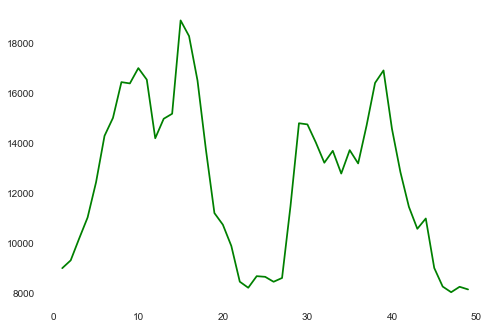

In [18]:
plt.plot(tempo, area_boca, color='g')
plt.show()

Analisando o vídeo novamente, com o parâmetro de bocejo a partir de 1200 pixels quadrados, conforme indicou o gráfico das áreas da boca ao longo do tempo.

Podemos utilizar a mesma análise de processamento a cada 5 quadros, porém quando a área for maior que o limite identificado, será contabilizado um bocejo.

O contador de bocejo será ativado toda a vez que for identificado um intervalo de bocejo e não bocejo.

In [22]:
video = cv2.VideoCapture("videos/bocejo-gray.mp4")

print("Analisando...")

bocejo_anterior = False
qtde_bocejos = 0

while True:
    ret, frame = video.read()
    if ret:
        frame_c += 1
        if frame_c == 5:
            frame_c = 0
            marcos_faciais = obter_marcos(frame)
            if marcos_faciais is not None:
                area_boca = cv2.contourArea(marcos_faciais[0][LABIO])
                
                if area_boca > 12000:
                    bocejo = True
                else:
                    bocejo = False

                if bocejo_anterior == True and bocejo == False:
                    qtde_bocejos += 1
                    print("Bocejos " + str(qtde_bocejos))
                
                bocejo_anterior = bocejo
    else:
        break

print("Terminado")

video.release()

Analisando...
Bocejos 1
Bocejos 2
Terminado
